In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/Classroom/german_credit_data.csv')

#### Bank Customer Segmentation in Germany is a data set that includes crucial information about credit operations.  Customer segmentation is key when analyzing profitability and risk.  By categorizing customers into segments based on factors suchas income, age, credit, history and spending habts banks can design personalized offerings that cater to the requirements of each group by also increasing profitability and reduce risk.  
  
  The Dataset was obtained in Kaggle and it contains 22 columns and 20000 rows

# Research Question:  
 Understand customer behaviors, preferences and needs so the institution can better tailor services, products and marketing efforts to distinct customer groups


In [ ]:
df.head()

,CustomerID,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,1,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,2,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,3,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,4,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,5,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [ ]:
#columns that exist in the data set
df.columns

Index(['CustomerID', 'CheckingStatus', 'LoanDuration', 'CreditHistory',
       'LoanPurpose', 'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk'],
      dtype='object')

In [ ]:
df.shape

(20000, 22)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CustomerID                20000 non-null  int64 
 1   CheckingStatus            20000 non-null  object
 2   LoanDuration              20000 non-null  int64 
 3   CreditHistory             20000 non-null  object
 4   LoanPurpose               20000 non-null  object
 5   LoanAmount                20000 non-null  int64 
 6   ExistingSavings           20000 non-null  object
 7   EmploymentDuration        20000 non-null  object
 8   InstallmentPercent        20000 non-null  int64 
 9   Sex                       20000 non-null  object
 10  OthersOnLoan              20000 non-null  object
 11  CurrentResidenceDuration  20000 non-null  int64 
 12  OwnsProperty              20000 non-null  object
 13  Age                       20000 non-null  int64 
 14  InstallmentPlans      

#Data Cleaning

In [49]:
df.isnull().sum()

CustomerID                  0
CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
Sex                         0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
Risk                        0
dtype: int64

In [50]:
df.isna().sum()

CustomerID                  0
CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
Sex                         0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
Risk                        0
dtype: int64

In [51]:
df.drop_duplicates()

,CustomerID,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,1,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,2,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,3,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,4,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,5,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,...,unknown,57,none,own,2,skilled,1,none,yes,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,greater_200,27,credits_paid_to_date,furniture,4650,less_100,1_to_4,3,male,...,savings_insurance,40,none,own,1,skilled,1,none,yes,No Risk
19996,19997,0_to_200,11,prior_payments_delayed,furniture,250,greater_1000,4_to_7,3,male,...,car_other,32,bank,own,1,unemployed,1,none,yes,No Risk
19997,19998,no_checking,32,outstanding_credit,appliances,6536,unknown,greater_7,5,male,...,unknown,54,stores,own,2,unskilled,2,yes,yes,Risk
19998,19999,0_to_200,38,outstanding_credit,other,1597,500_to_1000,greater_7,3,female,...,savings_insurance,27,stores,own,1,skilled,1,none,yes,Risk


In [52]:
#list of loan purposes that the bank allocate
df['LoanPurpose'].unique()

array(['other', 'car_new', 'furniture', 'retraining', 'education',
       'vacation', 'appliances', 'car_used', 'repairs', 'radio_tv',
       'business'], dtype=object)

In [ ]:
#ranking of LoanPurpose from top to bottom
df.groupby('LoanPurpose')['CustomerID'].count().sort_values(ascending=False)

LoanPurpose
car_new       3780
furniture     3412
car_used      3232
radio_tv      3020
appliances    2244
repairs       1132
vacation       820
education      668
retraining     656
business       584
other          452
Name: CustomerID, dtype: int64

In [137]:
#ranking of LoanPurpose from top to bottom
df.groupby('LoanPurpose')['CustomerID'].sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f50a251ee00>>

In [139]:
df['LoanPurpose'].count()

20000

<Axes: xlabel='LoanPurpose'>

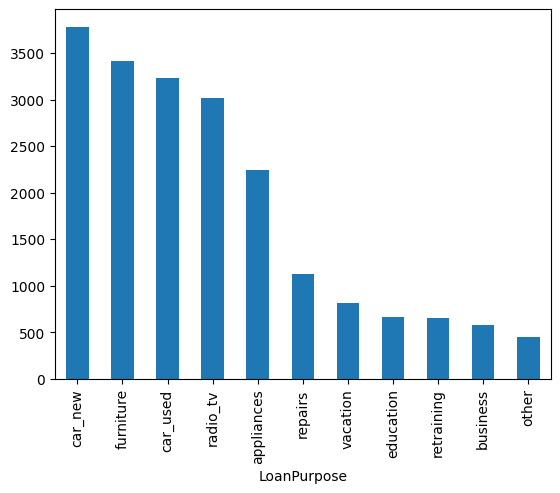

In [ ]:
#visualization of ranking of LoanPurpose from top to bottom
df.groupby('LoanPurpose')['CustomerID'].count().sort_values(ascending=False).plot(kind='bar')

In [65]:
#ranking of CreditHistory from top to bottom
df.groupby('CreditHistory')['CustomerID'].count().sort_values(ascending=False)

CreditHistory
prior_payments_delayed    6744
credits_paid_to_date      5960
outstanding_credit        3752
all_credits_paid_back     3076
no_credits                 468
Name: CustomerID, dtype: int64

<Axes: xlabel='CreditHistory'>

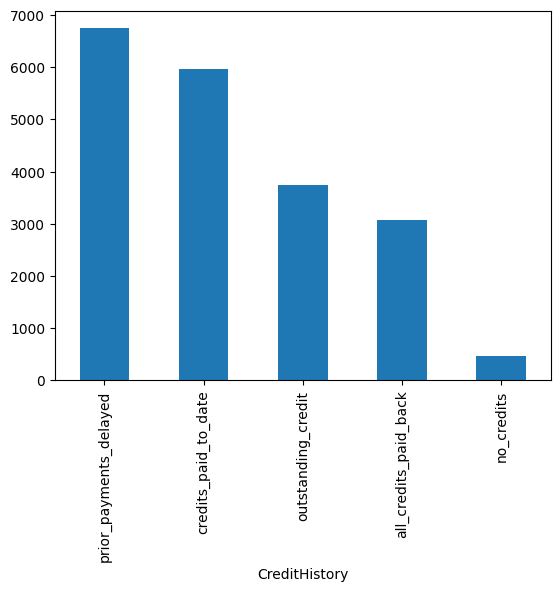

In [66]:
#visualization of ranking of CreditHistory from top to bottom
df.groupby('CreditHistory')['CustomerID'].count().sort_values(ascending=False).plot(kind='bar')

In [71]:
#age group and its corresponding ranking of CreditHistory from top to bottom
df.groupby('CreditHistory')['Age'].count().sort_values(ascending=False)

CreditHistory
prior_payments_delayed    6744
credits_paid_to_date      5960
outstanding_credit        3752
all_credits_paid_back     3076
no_credits                 468
Name: Age, dtype: int64

In [60]:
total_loan_amount=df['LoanAmount'].sum()
total_loan_amount

69602900

In [63]:
total_amount_per_purpose=df.groupby('LoanPurpose')['LoanAmount'].sum()
total_amount_per_purpose.sort_values(ascending=False)

LoanPurpose
radio_tv      12443888
furniture     11363640
appliances    11110236
car_used       9054072
car_new        5721712
repairs        5666648
vacation       3026716
other          3023488
business       2959984
education      2691088
retraining     2541428
Name: LoanAmount, dtype: int64

<Axes: xlabel='LoanPurpose'>

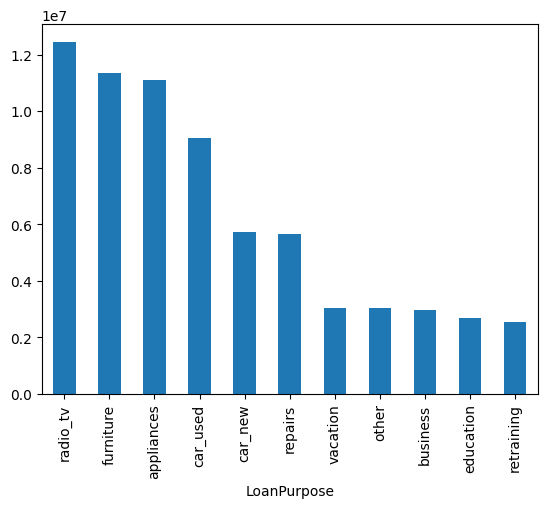

In [64]:
total_amount_per_purpose.sort_values(ascending=False).plot(kind='bar')

In [132]:
# Calculate the total loan amount
total_loan_amount = df['LoanAmount'].sum()
# Calculate the total loan amount per loan purpose
total_amount_per_purpose = df.groupby('LoanPurpose')['LoanAmount'].sum()

# Calculate the percentage of loan amount compared to the total
total_amount_per_purpose['Percentage'] = (total_amount_per_purpose / total_loan_amount) * 100
percent=total_amount_per_purpose['Percentage'].sort_values(ascending=False)
percent

LoanPurpose
radio_tv      17.878404
furniture     16.326389
appliances    15.962318
car_used      13.008182
car_new        8.220508
repairs        8.141396
vacation       4.348549
other          4.343911
business       4.252673
education      3.866345
retraining     3.651325
Name: LoanAmount, dtype: float64

In [3]:
#who applies for most loans, females or males?
df.groupby('Sex')['CustomerID'].count().sort_values(ascending=False)

Sex
male      12416
female     7584
Name: CustomerID, dtype: int64

<Axes: xlabel='Sex'>

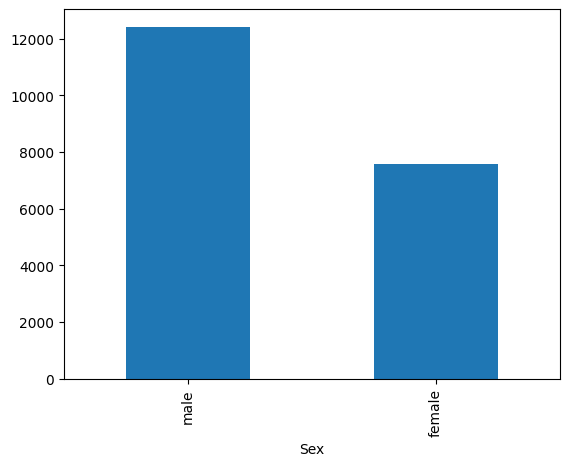

In [4]:
#visualization who applies for most loans, femeles or males?
df.groupby('Sex')['CustomerID'].count().sort_values(ascending=False).plot(kind='bar')

In [5]:
#what are the existing savings of the peple getting loans?
df.groupby('ExistingSavings')['CustomerID'].count().sort_values(ascending=False)

ExistingSavings
less_100        7424
100_to_500      4532
500_to_1000     4312
greater_1000    2232
unknown         1500
Name: CustomerID, dtype: int64

<Axes: xlabel='ExistingSavings'>

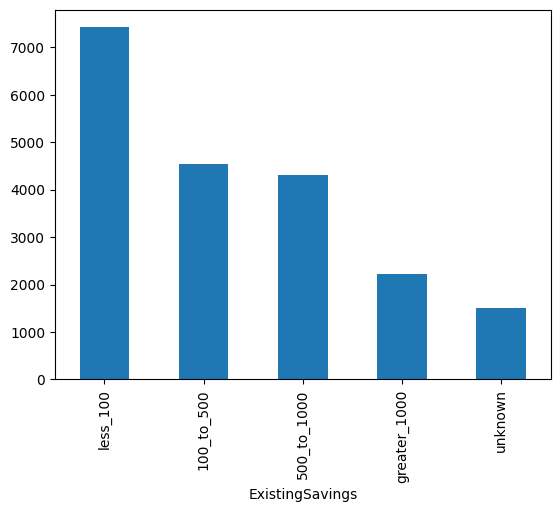

In [6]:
#visualization of what are the existing savings of the peple getting loans?
df.groupby('ExistingSavings')['CustomerID'].count().sort_values(ascending=False).plot(kind='bar')

In [7]:
#what type of asset is owned by the peple getting loans?
df.groupby('OwnsProperty')['CustomerID'].count().sort_values(ascending=False)

OwnsProperty
savings_insurance    6640
car_other            6160
real_estate          4348
unknown              2852
Name: CustomerID, dtype: int64

<Axes: xlabel='OwnsProperty'>

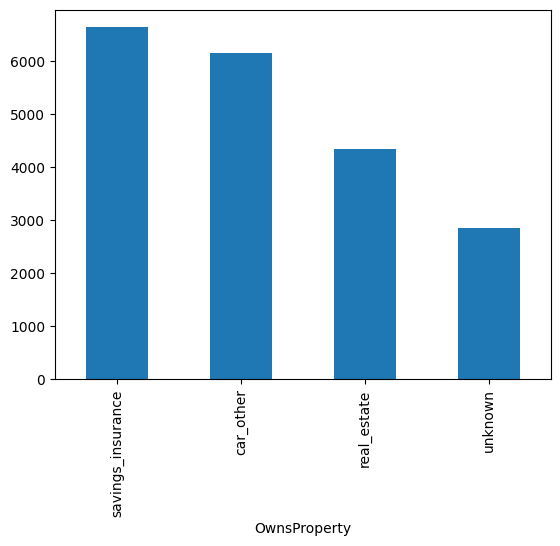

In [8]:
#visualization of what type of asset is owned by the peple getting loans?
df.groupby('OwnsProperty')['CustomerID'].count().sort_values(ascending=False).plot(kind='bar')

# who are the people applying for the car_new loans?

In [9]:
#what type of job activity is practiced by the peple getting loans?
df.groupby('Job')['CustomerID'].count().sort_values(ascending=False)

Job
skilled                     13600
unskilled                    2692
management_self-employed     2564
unemployed                   1144
Name: CustomerID, dtype: int64

<Axes: xlabel='Job'>

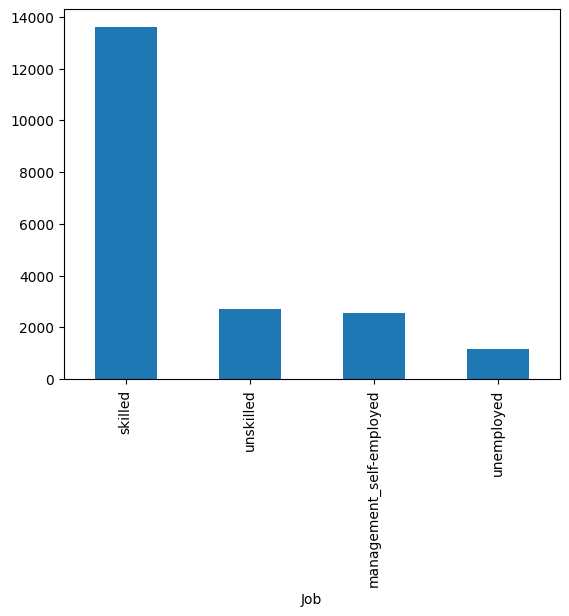

In [10]:
#visualization what type of job activity is practiced by the peple getting loans?
df.groupby('Job')['CustomerID'].count().sort_values(ascending=False).plot(kind='bar')

In [11]:
#what type of risk qualification do the peple getting loans have?
df.groupby('Risk')['CustomerID'].count().sort_values(ascending=False)

Risk
No Risk    13320
Risk        6680
Name: CustomerID, dtype: int64

<Axes: xlabel='Risk'>

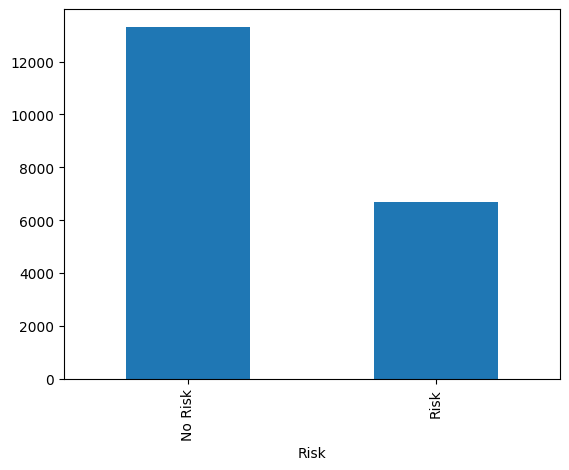

In [12]:
#visualization of what type of risk qualification do the peple getting loans have?
df.groupby('Risk')['CustomerID'].count().sort_values(ascending=False).plot(kind='bar')

In [14]:
#what are the ages of the peple getting loans?
df.groupby('Age')['CustomerID'].count().sort_values(ascending=False)

Age
19    1668
36     748
34     696
40     680
31     680
33     672
37     668
41     664
32     632
39     620
28     612
38     604
42     604
29     592
30     556
43     548
35     540
44     532
46     532
45     532
27     484
26     456
47     456
24     424
25     416
49     404
22     400
48     388
50     356
23     344
51     316
20     308
21     304
52     284
53     232
54     216
55     176
56     124
57     112
58     100
59      72
60      72
61      52
62      20
64      20
65      20
63      16
70      16
66      12
74       8
67       4
71       4
73       4
Name: CustomerID, dtype: int64

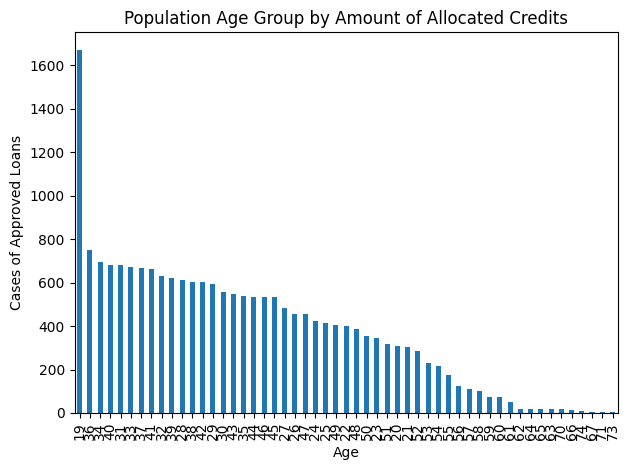

In [141]:
# visualization of what are the ages of the peple getting loans?
df.groupby('Age')['CustomerID'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Cases of Approved Loans')
plt.title('Population Age Group by Amount of Allocated Credits')
plt.tight_layout()
plt.show()

In [22]:
#what loan amounts of the peple getting loans in their corresponding age grouping?
pivot_table=df.pivot_table(index='Age', values='LoanAmount', aggfunc='mean')
pivot_table

,LoanAmount
Age,
19,921.865707
20,1361.012987
21,1217.000000
22,1406.730000
23,1669.941860
24,1709.981132
25,1977.192308
26,1913.500000
27,1938.495868


<Figure size 2500x1500 with 0 Axes>

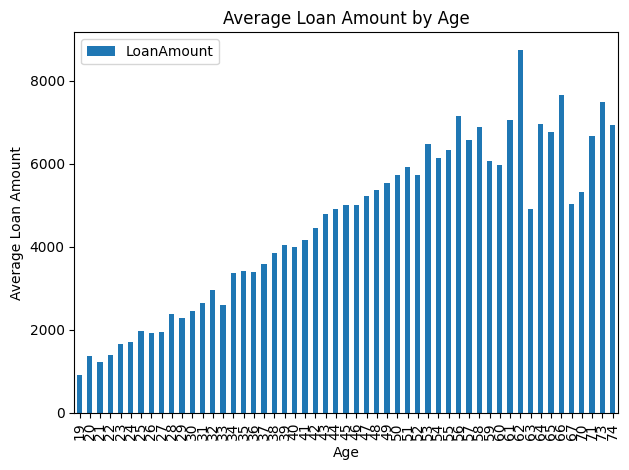

In [27]:
# visualization of #what loan amounts of the peple getting loans in their corresponding age grouping?
plt.figure(figsize=(25,15))
pivot_table.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Age')
plt.tight_layout()
plt.show()

In [31]:
#what's the average age of our clients that own an asset?
pivot_table_asset=df.pivot_table(index='OwnsProperty', values='Age', aggfunc='mean')
pivot_table_asset

,Age
OwnsProperty,
car_other,39.384416
real_estate,26.839926
savings_insurance,34.126506
unknown,46.542777


In [33]:
#what's the average age of our clients that have a job?
pivot_table_job=df.pivot_table(index='Job', values='Age', aggfunc='mean')
pivot_table_job

,Age
Job,
management_self-employed,38.338534
skilled,35.618235
unemployed,34.244755
unskilled,35.945022


In [39]:
#what's the average age of our clients that own a specific asset?
pivot_table_loanpurpose=df.pivot_table(index='LoanPurpose', values='Age', aggfunc='mean')
pivot_table_loanpurpose

,Age
LoanPurpose,
appliances,41.276292
business,38.739726
car_new,28.651852
car_used,33.714109
education,37.071856
furniture,36.254396
other,46.176991
radio_tv,39.484768
repairs,41.180212


<Axes: xlabel='LoanPurpose'>

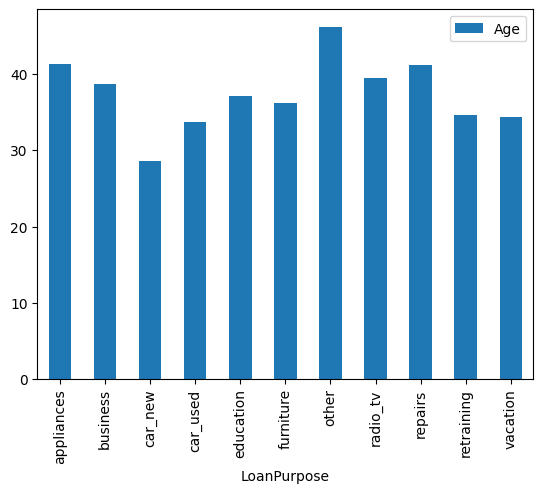

In [40]:
#visualization of what's the average age of our clients that own a specific asset?
pivot_table_loanpurpose.plot(kind='bar')

In [42]:
#what's the average age of our clients for different loan durations?
pivot_table_loanduration=df.pivot_table(index='LoanDuration', values='Age', aggfunc='mean')
pivot_table_loanduration

,Age
LoanDuration,
4,25.205418
5,28.660000
6,26.333333
7,24.240000
8,32.883721
9,29.741935
10,29.355932
11,30.270270
12,29.712121


<Axes: xlabel='LoanDuration'>

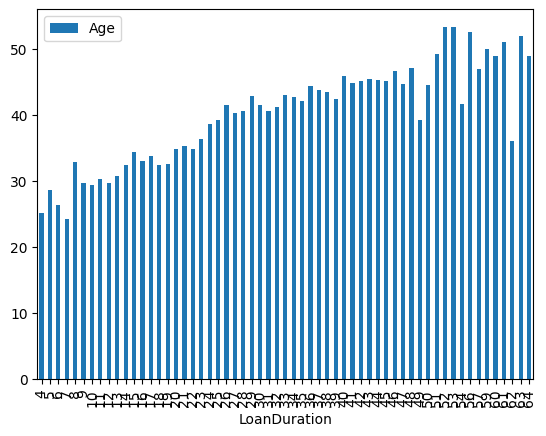

In [43]:
#visualization of what's the average age of our clients for different loan durations?
pivot_table_loanduration=df.pivot_table(index='LoanDuration', values='Age', aggfunc='mean')
pivot_table_loanduration.plot(kind='bar')

In [47]:
#what's the average clientele age to their corresponding employment duration?
pivot_table_risk=df.pivot_table(index='EmploymentDuration', values='Age', aggfunc='mean')
pivot_table_risk

,Age
EmploymentDuration,
1_to_4,33.765306
4_to_7,39.032143
greater_7,45.607527
less_1,28.753319
unemployed,23.560811


In [57]:
#what's the average loan amount per loan purpose?
pivot_table_loanamount=df.pivot_table(index='LoanPurpose', values='LoanAmount', aggfunc='mean')
pivot_table_loanamount

,LoanAmount
LoanPurpose,
appliances,4951.085561
business,5068.465753
car_new,1513.680423
car_used,2801.383663
education,4028.574850
furniture,3330.492380
other,6689.132743
radio_tv,4120.492715
repairs,5005.872792


<Axes: xlabel='LoanPurpose'>

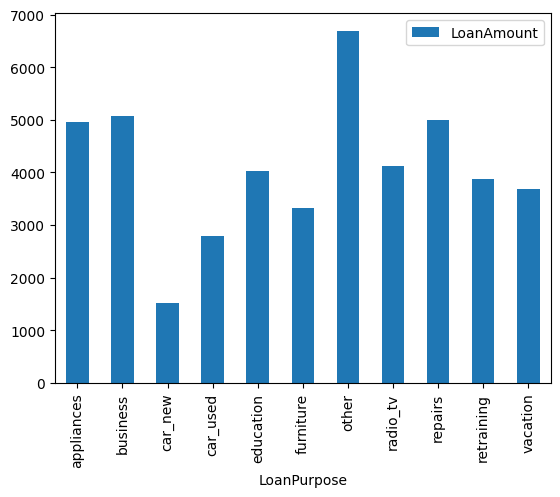

In [56]:
# visualization of what's the average loan amount per loan purpose?
pivot_table_loanamount.plot(kind='bar')

In [ ]:
new_cars=df.loc[df['LoanPurpose']=='car_new']
new_cars

,CustomerID,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
1,2,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
6,7,no_checking,9,prior_payments_delayed,car_new,1032,100_to_500,4_to_7,3,male,...,savings_insurance,41,none,own,1,management_self-employed,1,none,yes,No Risk
8,9,0_to_200,11,credits_paid_to_date,car_new,4553,less_100,less_1,3,female,...,savings_insurance,22,none,own,1,management_self-employed,1,none,yes,No Risk
10,11,less_0,5,all_credits_paid_back,car_new,1523,less_100,unemployed,2,female,...,real_estate,19,none,rent,1,management_self-employed,1,none,yes,No Risk
14,15,greater_200,4,all_credits_paid_back,car_new,2407,less_100,1_to_4,3,female,...,car_other,52,none,own,1,skilled,2,yes,yes,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19970,19971,0_to_200,16,credits_paid_to_date,car_new,1387,less_100,less_1,2,female,...,savings_insurance,28,none,own,1,skilled,1,none,yes,No Risk
19973,19974,less_0,14,all_credits_paid_back,car_new,2244,less_100,less_1,2,female,...,real_estate,21,none,own,1,skilled,1,none,yes,No Risk
19982,19983,0_to_200,9,no_credits,car_new,250,less_100,unemployed,2,female,...,real_estate,19,none,own,1,skilled,1,none,yes,No Risk
19989,19990,0_to_200,25,credits_paid_to_date,car_new,2021,500_to_1000,1_to_4,3,male,...,car_other,38,none,rent,1,skilled,1,none,yes,No Risk


In [ ]:
used_cars=df.loc[df['LoanPurpose']=='car_used']
used_cars

,CustomerID,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
11,12,less_0,9,all_credits_paid_back,car_used,4302,less_100,1_to_4,3,male,...,car_other,34,none,free,1,skilled,1,none,yes,No Risk
26,27,less_0,23,prior_payments_delayed,car_used,250,greater_1000,1_to_4,2,male,...,real_estate,19,stores,rent,1,skilled,1,none,yes,No Risk
32,33,less_0,21,prior_payments_delayed,car_used,319,100_to_500,greater_7,3,male,...,savings_insurance,32,none,rent,1,skilled,1,none,yes,Risk
35,36,less_0,15,prior_payments_delayed,car_used,1420,100_to_500,4_to_7,2,male,...,car_other,35,stores,rent,1,skilled,1,none,yes,No Risk
37,38,no_checking,28,outstanding_credit,car_used,4904,500_to_1000,1_to_4,2,male,...,car_other,40,none,own,1,skilled,2,yes,yes,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,19979,no_checking,8,credits_paid_to_date,car_used,6602,less_100,unemployed,3,male,...,savings_insurance,29,none,free,1,management_self-employed,1,yes,yes,No Risk
19983,19984,0_to_200,32,credits_paid_to_date,car_used,3706,greater_1000,1_to_4,4,female,...,car_other,36,stores,own,2,unskilled,2,yes,yes,No Risk
19986,19987,less_0,4,all_credits_paid_back,car_used,250,less_100,unemployed,1,male,...,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
19992,19993,no_checking,8,credits_paid_to_date,car_used,1654,less_100,1_to_4,2,male,...,savings_insurance,36,none,own,1,skilled,1,yes,yes,No Risk


In [ ]:
combined_cars = pd.concat([new_cars, used_cars], ignore_index=True)
combined_cars

,CustomerID,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,2,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
1,7,no_checking,9,prior_payments_delayed,car_new,1032,100_to_500,4_to_7,3,male,...,savings_insurance,41,none,own,1,management_self-employed,1,none,yes,No Risk
2,9,0_to_200,11,credits_paid_to_date,car_new,4553,less_100,less_1,3,female,...,savings_insurance,22,none,own,1,management_self-employed,1,none,yes,No Risk
3,11,less_0,5,all_credits_paid_back,car_new,1523,less_100,unemployed,2,female,...,real_estate,19,none,rent,1,management_self-employed,1,none,yes,No Risk
4,15,greater_200,4,all_credits_paid_back,car_new,2407,less_100,1_to_4,3,female,...,car_other,52,none,own,1,skilled,2,yes,yes,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,19979,no_checking,8,credits_paid_to_date,car_used,6602,less_100,unemployed,3,male,...,savings_insurance,29,none,free,1,management_self-employed,1,yes,yes,No Risk
7008,19984,0_to_200,32,credits_paid_to_date,car_used,3706,greater_1000,1_to_4,4,female,...,car_other,36,stores,own,2,unskilled,2,yes,yes,No Risk
7009,19987,less_0,4,all_credits_paid_back,car_used,250,less_100,unemployed,1,male,...,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
7010,19993,no_checking,8,credits_paid_to_date,car_used,1654,less_100,1_to_4,2,male,...,savings_insurance,36,none,own,1,skilled,1,yes,yes,No Risk


AttributeError: ignored

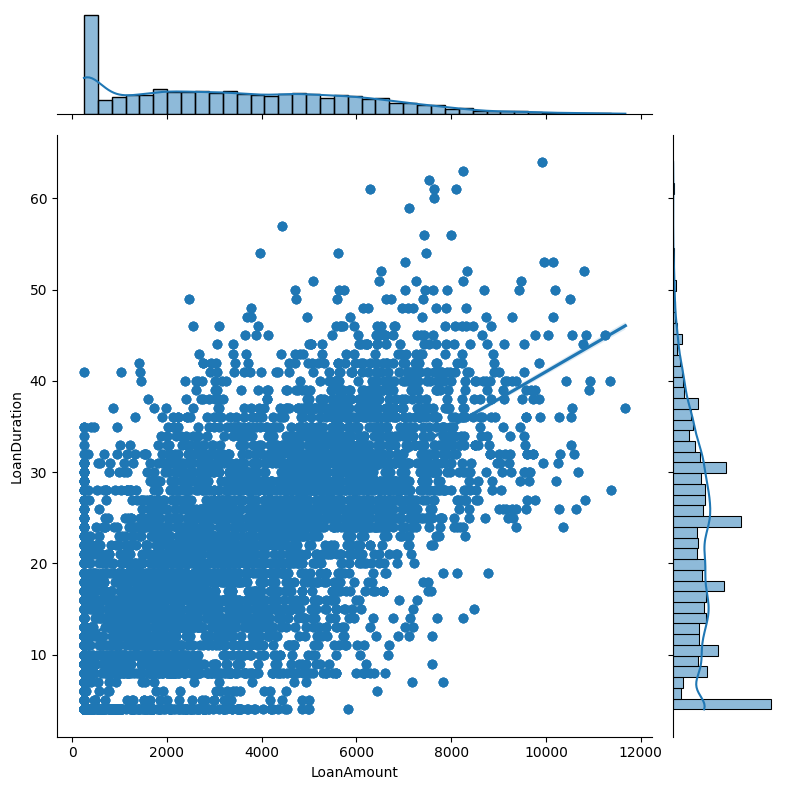

In [74]:
r1 = sns.jointplot(x="LoanAmount",y="LoanDuration", data=df, kind="reg", height=8)
r1.annotate(stats.pearsonr)
plt.show()

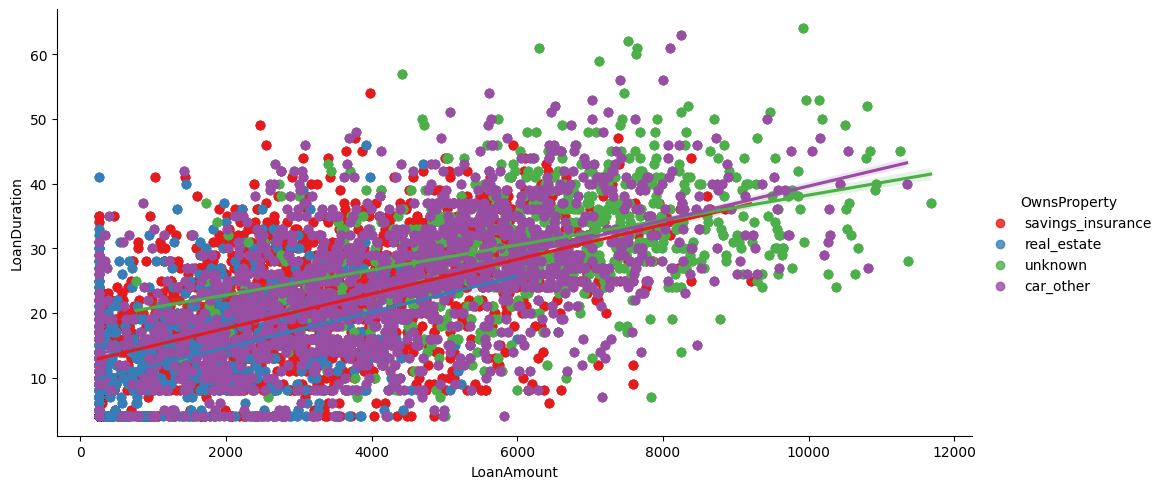

In [76]:
sns.lmplot(x="LoanAmount",y="LoanDuration", hue="OwnsProperty", data=df, palette="Set1", aspect=2)
plt.show()

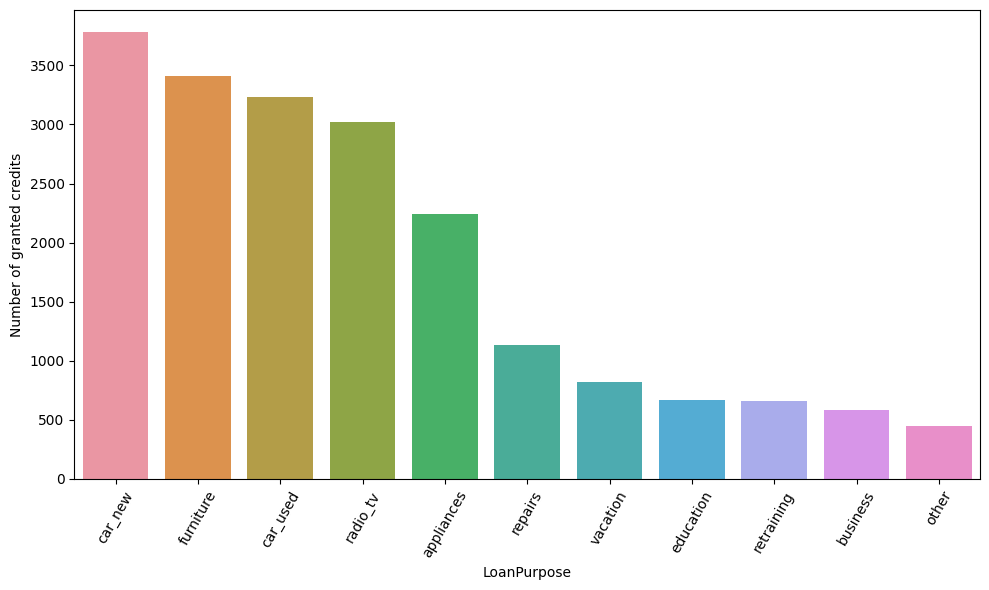

In [83]:
n_credits = df.groupby("LoanPurpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="LoanPurpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

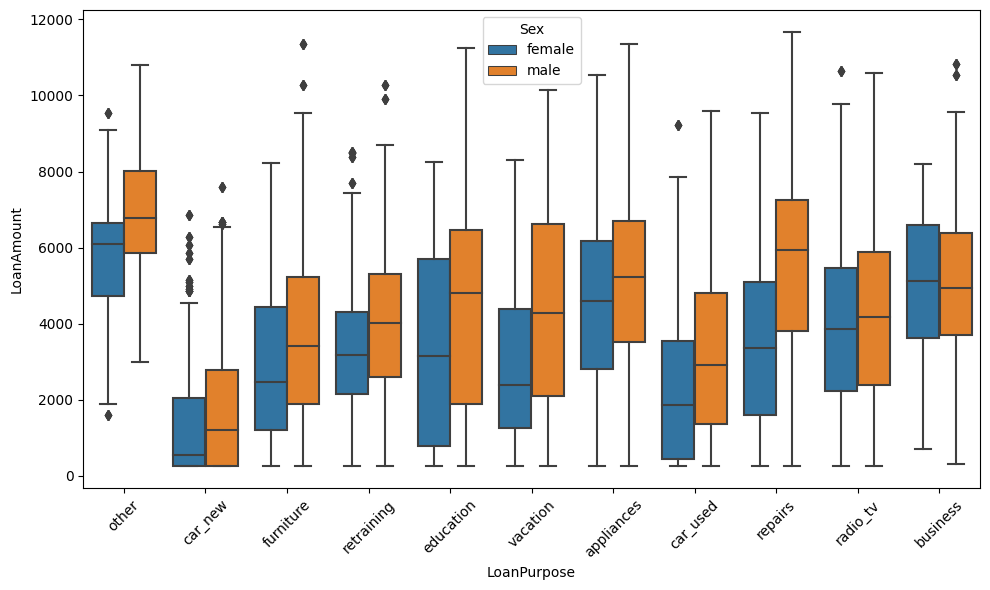

In [89]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x='LoanPurpose',y='LoanAmount', hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

boxes("LoanPurpose","LoanAmount","Sex")

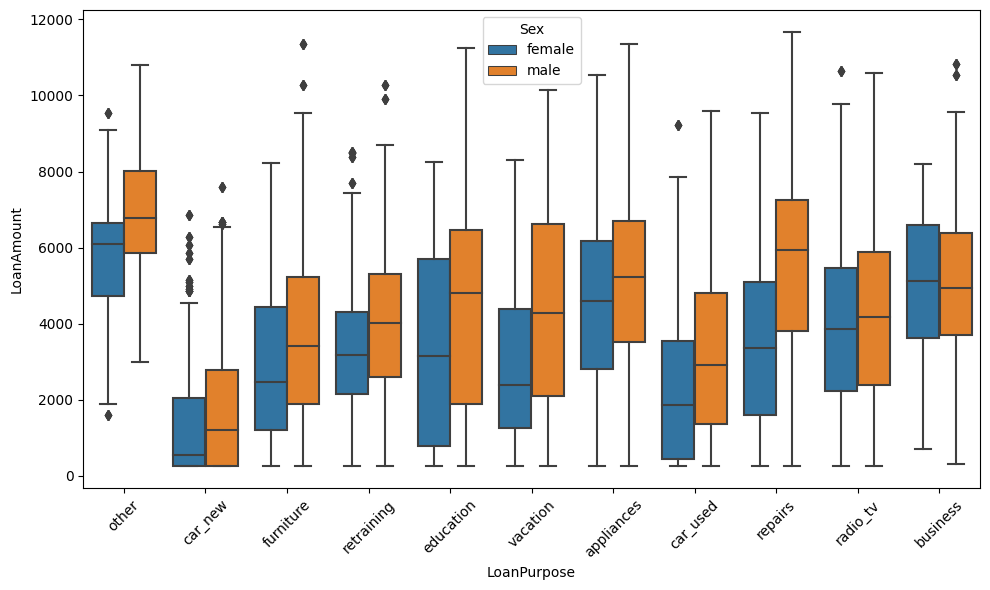

In [90]:
boxes("LoanPurpose","LoanDuration","Sex")

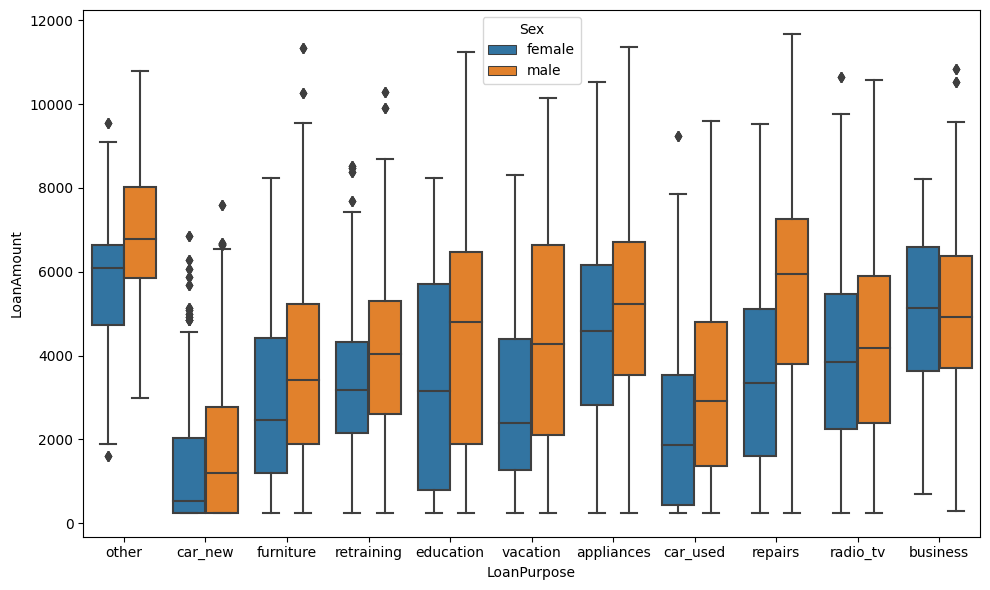

In [91]:
boxes("OwnsProperty","LoanAmount","Sex",r=0)

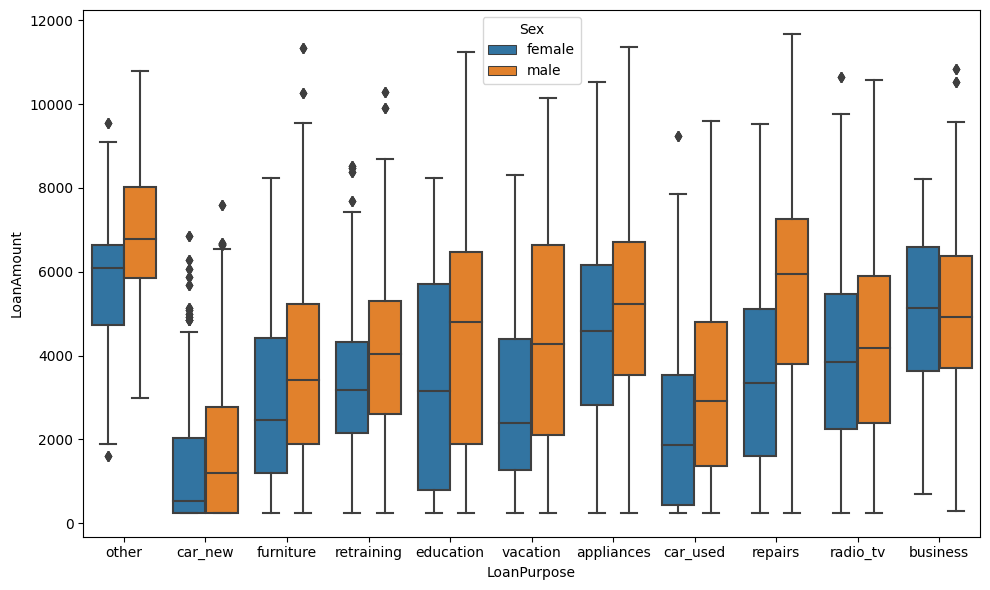

In [92]:
boxes("Job","LoanAmount","Sex",r=0)

Text(0.5, 0, 'Age')

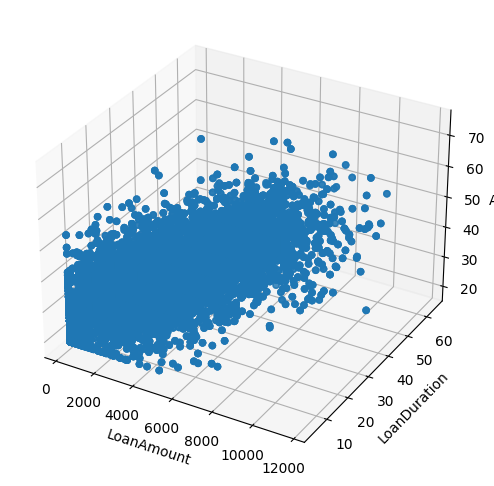

In [93]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["LoanAmount"], df["LoanDuration"], df["Age"])
ax.set_xlabel("LoanAmount")
ax.set_ylabel("LoanDuration")
ax.set_zlabel("Age")

In [94]:
#Selecting columns for clusterisation with k-means
selected_cols = ["Age","LoanAmount", "LoanDuration"]
cluster_data = df.loc[:,selected_cols]

In [95]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["LoanAmount"], ax=ax2)
    sns.distplot(df["LoanDuration"], ax=ax3)
    plt.tight_layout()

<ipython-input-95-d1a407785066>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], ax=ax1)
<ipython-input-95-d1a407785066>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LoanAmount"], ax=ax2)
<ipython-input-95-d1a407785066>:5: UserWarning: 

`distplot` is a deprecated function and

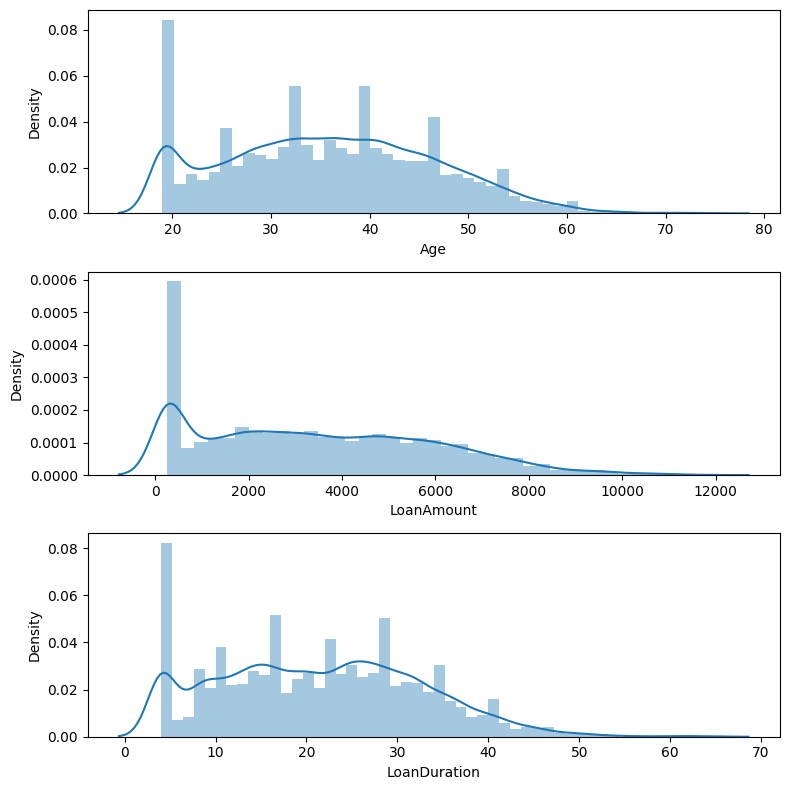

In [96]:
distributions(cluster_data)

<ipython-input-95-d1a407785066>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], ax=ax1)
<ipython-input-95-d1a407785066>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LoanAmount"], ax=ax2)
<ipython-input-95-d1a407785066>:5: UserWarning: 

`distplot` is a deprecated function and

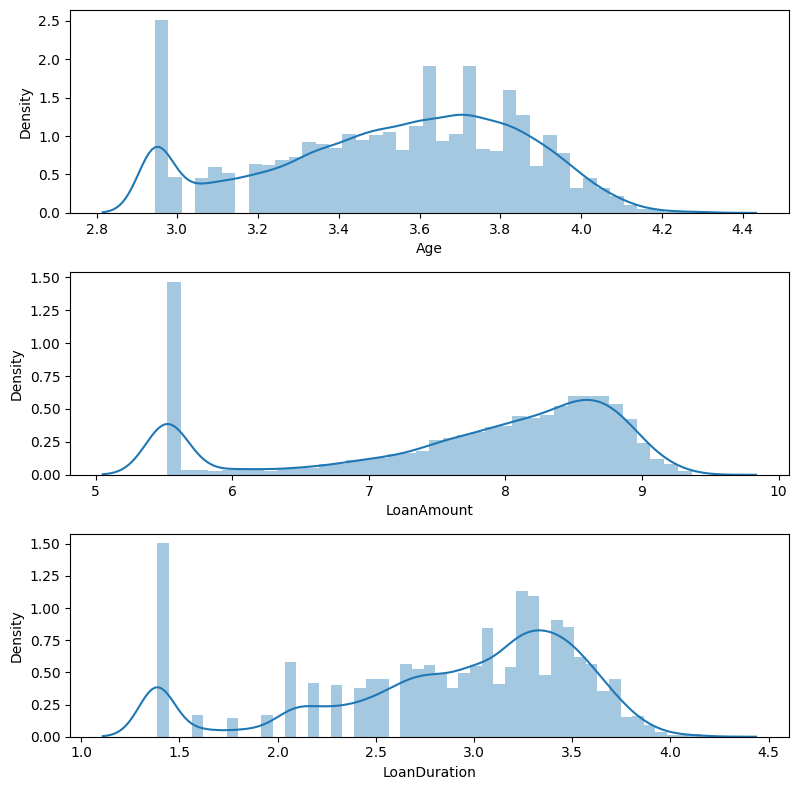

In [99]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

In [111]:
# Calculate the total loan amount
total_loan_amount = df['LoanAmount'].sum()
total_loan_amount


69602900

In [112]:
# Calculate the total loan amount per loan purpose
total_amount_per_purpose = df.groupby('LoanPurpose')['LoanAmount'].sum()
total_amount_per_purpose

LoanPurpose
appliances    11110236
business       2959984
car_new        5721712
car_used       9054072
education      2691088
furniture     11363640
other          3023488
radio_tv      12443888
repairs        5666648
retraining     2541428
vacation       3026716
Name: LoanAmount, dtype: int64

# Conclusion

The majority of people approved to have loans are 19 year old, this doesn’t mean that the highest amount of credit loan amount goes to this segment.  

The most approved type of loan is to purchase a new car, this doesn’t mean that in total is the type of credit with the most loan amount allocated.  

The Type of credit with the highest loan allocation is radio_tv, followed by furniture.  New Car Loan is located in the 5th place.  

Marketing department should target different ranges of ages and types of loans, striving to reach all population ages and needs of loan types.
